### FAKE NEWS CLASSIFICATION PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import nltk

In [2]:
fake_news_df=pd.read_csv('fake_news\\train.csv')

In [3]:
fake_news_df.drop('id',axis=1,inplace=True)

In [4]:
fake_news_df

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [6]:
fake_news_df['label'].value_counts()
# 1 means Unreliable
# 0 means reliable

1    10413
0    10387
Name: label, dtype: int64

In [7]:
fake_news_df.isna().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
fake_news_df.shape

(20800, 4)

In [9]:
fake_news_df.dropna(axis=0,inplace=True)

In [10]:
fake_news_df.shape

(18285, 4)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [12]:
fake_news_df.reset_index(inplace=True)

In [13]:
fake_news_df['title']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
18280    Rapper T.I.: Trump a ’Poster Child For White S...
18281    N.F.L. Playoffs: Schedule, Matchups and Odds -...
18282    Macy’s Is Said to Receive Takeover Approach by...
18283    NATO, Russia To Hold Parallel Exercises In Bal...
18284                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [87]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

ps = PorterStemmer()
lemmatizerr=WordNetLemmatizer()
corpus = []

for i in range(0, len(fake_news_df)):
    review = re.sub('[^a-zA-Z]', ' ', fake_news_df['title'][i])
    review = review.lower()
    review = nltk.word_tokenize(review)
    review = [lemmatizerr.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [88]:
# Output of Lemmatizing
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [25]:
#Output of Stemming
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [26]:
c_v = CountVectorizer(max_features=5000, ngram_range=(1, 3))
x = c_v.fit_transform(corpus).toarray()


In [109]:
tf_idf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
tf_idf_features = c_v.fit_transform(corpus).toarray()

In [27]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
tf_idf_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
x.shape

(18285, 5000)

In [91]:
tf_idf_features.shape

(18285, 5000)

In [29]:
c_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [31]:
c_v.get_feature_names()[0:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident']

In [33]:
y=fake_news_df['label']

In [34]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [37]:
bag_of_words=pd.DataFrame(x,columns=c_v.get_feature_names())

In [113]:
tf_idf_df=pd.DataFrame(tf_idf_features,columns=tf_idf.get_feature_names())

NotFittedError: Vocabulary not fitted or provided

In [38]:
bag_of_words

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bag_of_words,y, test_size=0.33, random_state=0)

In [114]:
# SPLITS FOR TFIDF APPROACH
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(tf_idf_features,y, test_size=0.33, random_state=0)

In [41]:
print(x_train.shape)
print(x_test.shape)

(12250, 5000)
(6035, 5000)


In [115]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [116]:
classifier.fit(x_train_tf, y_train_tf)
preds = classifier.predict(x_test_tf)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

In [117]:
confusion_mat=confusion_matrix(y_test_tf,preds)

In [50]:
confusion_mat

array([[3044,  345],
       [ 251, 2395]], dtype=int64)

In [118]:
confusion_mat

array([[3050,  339],
       [ 279, 2367]], dtype=int64)

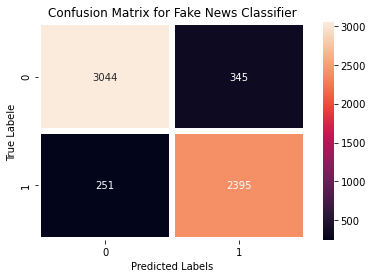

In [67]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_mat,annot=True,fmt='.0f', linewidths=5,
    linecolor='white',
    cbar=True)
plt.title('Confusion Matrix for Fake News Classifier')
plt.ylabel('True Labele')
plt.xlabel('Predicted Labels');

In [68]:
accuracy=accuracy_score(y_test,preds)

In [69]:
accuracy

0.9012427506213753

###### Passive Aggressive Classifier Algorithm

In [71]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(x_train,y_train)
passive_preds=linear_clf.predict(x_test)

In [72]:
confusion_mat_passive=confusion_matrix(y_test,passive_preds)

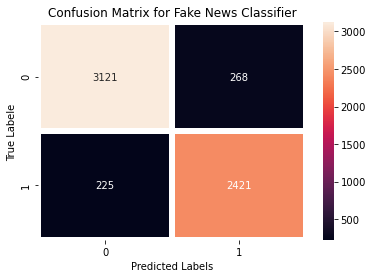

In [73]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_mat_passive,annot=True,fmt='.0f', linewidths=5,
    linecolor='white',
    cbar=True)
plt.title('Confusion Matrix for Fake News Classifier')
plt.ylabel('True Labele')
plt.xlabel('Predicted Labels');

In [74]:
accuracy_pass=accuracy_score(y_test,passive_preds)

In [75]:
accuracy_pass

0.9183098591549296

In [76]:
feature_names_cv=c_v.get_feature_names()

In [77]:
feature_names_cv

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'african american',
 'aftermath',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbart',
 'agent',
 'aggress',
 'ago',
 '

In [78]:
# Finding the most real words from the dataset
sorted(zip(classifier.coef_[0],feature_names_cv),reverse=True)[:20]

[(-4.011057584323453, 'trump'),
 (-4.298739656775234, 'hillari'),
 (-4.407237574655938, 'clinton'),
 (-4.910696682605166, 'elect'),
 (-5.187228107337437, 'new'),
 (-5.245335738144718, 'comment'),
 (-5.284556451297999, 'video'),
 (-5.397351945443344, 'war'),
 (-5.407352028777927, 'us'),
 (-5.4225421942719025, 'hillari clinton'),
 (-5.4276572949386725, 'fbi'),
 (-5.491170700660998, 'vote'),
 (-5.576692874099161, 'email'),
 (-5.588669065145876, 'world'),
 (-5.644411048154112, 'obama'),
 (-5.7448297959011585, 'donald'),
 (-5.773403168345214, 'donald trump'),
 (-5.79538207506399, 'russia'),
 (-5.856469767043828, 'day'),
 (-5.872343116200118, 'america')]

In [85]:
# Finding the most fake words from the dataset
sorted(zip(classifier.coef_[0],feature_names_cv))[:20]

[(-10.70065685350242, 'abe'),
 (-10.70065685350242, 'abroad'),
 (-10.70065685350242, 'abus new'),
 (-10.70065685350242, 'abus new york'),
 (-10.70065685350242, 'act new'),
 (-10.70065685350242, 'act new york'),
 (-10.70065685350242, 'advic'),
 (-10.70065685350242, 'advis new'),
 (-10.70065685350242, 'advis new york'),
 (-10.70065685350242, 'age new'),
 (-10.70065685350242, 'age new york'),
 (-10.70065685350242, 'agenda breitbart'),
 (-10.70065685350242, 'ail'),
 (-10.70065685350242, 'aleppo new'),
 (-10.70065685350242, 'aleppo new york'),
 (-10.70065685350242, 'ali'),
 (-10.70065685350242, 'america breitbart'),
 (-10.70065685350242, 'america new york'),
 (-10.70065685350242, 'american breitbart'),
 (-10.70065685350242, 'american new')]

#### LSTM IMPLEMENTATION

In [14]:
fake_news_df

,index,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
18280,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [22]:
import tensorflow
import keras
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [17]:
voc_size=5000

In [20]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

ps = PorterStemmer()
lemmatizerr=WordNetLemmatizer()
corpus = []

for i in range(0, len(fake_news_df)):
    review = re.sub('[^a-zA-Z]', ' ', fake_news_df['title'][i])
    review = review.lower()
    review = nltk.word_tokenize(review)
    review = [lemmatizerr.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [25]:
one_hot_rep=[]
for words in corpus:
    repres=one_hot(words,voc_size)
    one_hot_rep.append(repres)

In [26]:
one_hot_rep

[[3885, 413, 4591, 4660, 2128, 334, 295, 47, 597, 36],
 [4855, 2737, 934, 26, 1272, 2579, 3432],
 [2440, 4588, 194, 4391],
 [1009, 4661, 683, 1785, 4793, 4454],
 [3091, 1272, 4306, 2724, 434, 1494, 1272, 3854, 2364, 2493],
 [812,
  90,
  1209,
  1231,
  499,
  4166,
  771,
  1703,
  3552,
  1618,
  2821,
  1067,
  4567,
  2024,
  3432],
 [2487, 2780, 3612, 3920, 2953, 3369, 3812, 4604, 2774, 486, 2387],
 [4070, 2272, 3855, 609, 2484, 2779, 4166, 466, 2774, 486, 2387],
 [4473, 3907, 3792, 1810, 724, 3595, 2075, 2401, 4166, 2770],
 [4338, 2539, 4299, 1892, 1072, 4612, 3301, 1969],
 [194, 1043, 2676, 4347, 3207, 3613, 3278, 3962, 2435, 2509, 3246],
 [1785, 84, 2128, 1643, 4166, 2484],
 [1807, 4214, 3949, 4485, 3691, 1348, 736, 1069, 1312],
 [2493, 4200, 983, 2789, 3439, 1057, 834, 2774, 486, 2387],
 [2254, 275, 3288, 3710, 229, 2774, 486, 2387],
 [3658, 3267, 180, 642, 4583, 3521, 1992, 4406, 4327, 3101],
 [2078, 2092, 2737],
 [4576, 2049, 2563, 4306, 4166, 3392, 2920, 3432],
 [594, 3535,

In [28]:
sent_length=15
padded_data=pad_sequences(one_hot_rep,maxlen=sent_length,padding='pre')

In [29]:
padded_data

array([[   0,    0,    0, ...,   47,  597,   36],
       [   0,    0,    0, ..., 1272, 2579, 3432],
       [   0,    0,    0, ..., 4588,  194, 4391],
       ...,
       [   0,    0,    0, ..., 2774,  486, 2387],
       [   0,    0,    0, ..., 1987, 3094, 4688],
       [   0,    0,    0, ..., 3901, 2708, 3621]])

In [30]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
y=fake_news_df['label']

In [35]:
import numpy as np
X_final=np.array(padded_data)
y_final=np.array(y)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


In [38]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 7s 29ms/step - loss: 0.3350 - accuracy: 0.8406 - val_loss: 0.1985 - val_accuracy: 0.9162
Epoch 2/10
192/192 [==============================] - 5s 26ms/step - loss: 0.1328 - accuracy: 0.9453 - val_loss: 0.1918 - val_accuracy: 0.9203
Epoch 3/10
192/192 [==============================] - 5s 27ms/step - loss: 0.0866 - accuracy: 0.9682 - val_loss: 0.2390 - val_accuracy: 0.9158
Epoch 4/10
192/192 [==============================] - 5s 27ms/step - loss: 0.0577 - accuracy: 0.9799 - val_loss: 0.2679 - val_accuracy: 0.9140
Epoch 5/10
192/192 [==============================] - 6s 29ms/step - loss: 0.0364 - accuracy: 0.9884 - val_loss: 0.3058 - val_accuracy: 0.9072
Epoch 6/10
192/192 [==============================] - 5s 26ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.4087 - val_accuracy: 0.9128
Epoch 7/10
192/192 [==============================] - 6s 29ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.4901 - val_accuracy: 0.9117

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
y_pred=model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)